# Ford GoBike System Data

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#eda">Visualizations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
<a id='intro'></a>

# Introduction
<li>This project data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area,analysing  for overseeing the largest bike sharing program in the United States. I do generate regular reports by posing following question</li>






   <li> <a>What is the total duration in each month?</a></li>
      <li> <a>What is the summary of total rides in a day</a></li>
      <li> <a>What is propotion of subscribers and customers</a></li>
      <li> <a>How can compare the member_gender during the analysis</a></li>
      <li> <a>How the age range varying for using the bikedata</a></li>

In [1]:
#import necessary packages

from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math

# Wrangle Data 

In [2]:

folder_name_of_csvs = 'fordgobike_datafiles12'

In [3]:
makedirs(folder_name_of_csvs)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))
for month in range(1,8):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
     #code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
     #puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [4]:
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df1= pd.concat(list_csvs)

C:\Users\anast\Anaconda_3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [5]:
df1.to_csv('data.csv')

### Count the number of data

In [394]:
len(df1)

1538086

In [321]:
#Examine the dataframe
df1.head(10)

,Unnamed: 0,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,0.0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,1.0,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,2.0,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,3.0,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,4.0,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber
5,5.0,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,NaN,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,Customer
6,6.0,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer
7,7.0,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,NaN,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,Customer
8,8.0,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,Customer
9,9.0,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,Customer


In [322]:
#Check the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538086 entries, 0 to 199221
Data columns (total 17 columns):
Unnamed: 0                 519700 non-null float64
bike_id                    1538086 non-null int64
bike_share_for_all_trip    1018386 non-null object
duration_sec               1538086 non-null int64
end_station_id             1532841 non-null float64
end_station_latitude       1538086 non-null float64
end_station_longitude      1538086 non-null float64
end_station_name           1532841 non-null object
end_time                   1538086 non-null object
member_birth_year          1400419 non-null float64
member_gender              1400760 non-null object
start_station_id           1532841 non-null float64
start_station_latitude     1538086 non-null float64
start_station_longitude    1538086 non-null float64
start_station_name         1532841 non-null object
start_time                 1538086 non-null object
user_type                  1538086 non-null object
dtypes: float64(

## Exploratory Analysis

In [6]:
##Remove the columns which takes no impact on dataframe
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
##convert the time sec to min
df1['duration_sec'] = (df1['duration_sec'])/60

In [8]:
#Rename the column duration
df1.rename(columns={'duration_sec':'duration'},inplace=True)

In [389]:
df1['user_type'].value_counts()

Subscriber    1266823
Customer       271263
Name: user_type, dtype: int64

In [9]:
#convert into datetime format
df1['start_time']=pd.to_datetime(df1['start_time'])
df1['end_time']=pd.to_datetime(df1['end_time'])

In [10]:
#seperate the the column start date in to date column and time column
df1['start_time'],df1['start_date']= df1['start_time'].apply(lambda x:x.time()), df1['start_time'].apply(lambda x:x.date())
df1['end_time'],df1['end_date']= df1['end_time'].apply(lambda x:x.time()), df1['end_time'].apply(lambda x:x.date())


In [11]:
#split the date column into year and week
df1['start_week'] = df1['start_date'].map(lambda x: x.isocalendar()[1])
df1['start_year'] = df1['start_date'].map(lambda x: x.isocalendar()[0])

In [12]:
#Remove columns that no longer using for analysis
df1.drop(['end_station_id','end_station_latitude','end_station_longitude','end_station_name','start_station_id','start_station_id',],axis=1,inplace=True)

In [264]:
df1.start_station_name.describe()

count                                               1532841
unique                                                  315
top       San Francisco Ferry Building (Harry Bridges Pl...
freq                                                  37401
Name: start_station_name, dtype: object

In [354]:
df1.describe()

,Unnamed: 0,bike_id,duration,member_birth_year,start_station_latitude,start_station_longitude,start_week,start_year
count,519700.000000,1.538086e+06,1.538086e+06,1.400419e+06,1.538086e+06,1.538086e+06,1.538086e+06,1.538086e+06
mean,259849.500000,2.020603e+03,1.595632e+01,1.981805e+03,3.776897e+01,-1.223553e+02,2.561640e+01,2.017662e+03
std,150024.611786,1.152290e+03,4.819724e+01,1.056463e+01,9.766799e-02,1.521276e-01,1.323796e+01,4.729901e-01
min,0.000000,1.000000e+01,1.016667e+00,1.881000e+03,3.731285e+01,-1.224443e+02,1.000000e+00,2.017000e+03
25%,129924.750000,1.045000e+03,6.016667e+00,1.976000e+03,3.777179e+01,-1.224117e+02,1.600000e+01,2.017000e+03
50%,259849.500000,2.072000e+03,9.483333e+00,1.984000e+03,3.778175e+01,-1.223984e+02,2.500000e+01,2.018000e+03
75%,389774.250000,2.952000e+03,1.495000e+01,1.989000e+03,3.779539e+01,-1.223881e+02,3.500000e+01,2.018000e+03
max,519699.000000,4.307000e+03,1.439483e+03,2.000000e+03,4.551000e+01,-7.357000e+01,5.200000e+01,2.018000e+03


In [330]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538086 entries, 0 to 199221
Data columns (total 16 columns):
Unnamed: 0                 519700 non-null float64
bike_id                    1538086 non-null int64
bike_share_for_all_trip    1018386 non-null object
duration                   1538086 non-null float64
end_time                   1538086 non-null object
member_birth_year          1400419 non-null float64
member_gender              1400760 non-null object
start_station_latitude     1538086 non-null float64
start_station_longitude    1538086 non-null float64
start_station_name         1532841 non-null object
start_time                 1538086 non-null object
user_type                  1538086 non-null object
start_date                 1538086 non-null object
end_date                   1538086 non-null object
start_week                 1538086 non-null int64
start_year                 1538086 non-null int64
dtypes: float64(5), int64(3), object(8)
memory usage: 199.5+ MB


In [359]:
df1.bike_share_for_all_trip.value_counts()

No     934032
Yes     84354
Name: bike_share_for_all_trip, dtype: int64

#### Total duration over the each month

In [13]:
df1['start_date'] = pd.to_datetime(df1['start_date'])
df1.groupby(df1['start_date'].dt.strftime('%b'))['duration'].sum().sort_values()

start_date
Dec    1.344865e+06
Jan    1.376108e+06
Nov    1.510259e+06
Feb    1.562817e+06
Mar    1.616245e+06
Aug    1.749695e+06
Oct    1.844655e+06
Sep    1.907913e+06
Apr    1.936770e+06
May    2.552246e+06
Jun    3.012561e+06
Jul    4.128066e+06
Name: duration, dtype: float64

# Visualization 

### visualizing the variation of rides 

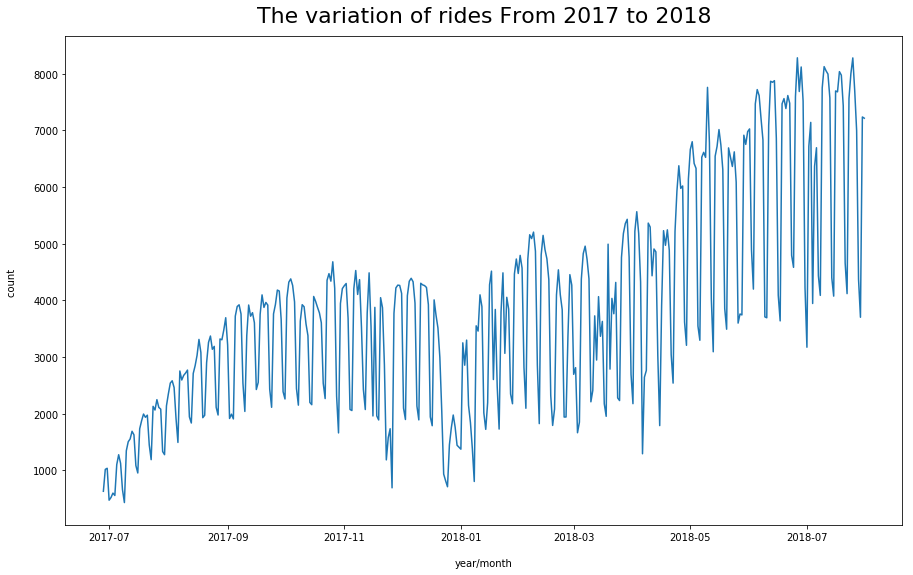

In [96]:
df1.groupby('start_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(15,9))
plt.title('The variation of rides From 2017 to 2018', fontsize=22, y=1.015)
plt.xlabel('year/month', labelpad=16)
plt.ylabel('count ', labelpad=16)
plt.savefig('image16.png');

### summary of Total rides in a day

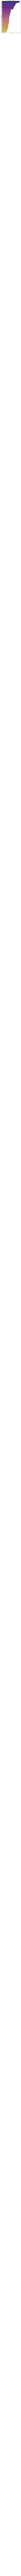

In [104]:
plt.figure(figsize=(8,14))
ax = sns.countplot(y=df1["start_week"],order=df1["start_week"].value_counts().index,
                   palette="plasma",linewidth = 1 ,edgecolor = "k"*df1["bike_id"].nunique())
plt.title("Total number of rides in a day ")
for i,j in enumerate(df1["bike_id"].value_counts().values):
    ax.text(.2,i,j,color = "white",weight="bold")

### propotion of subscribers and customers in user type of rides

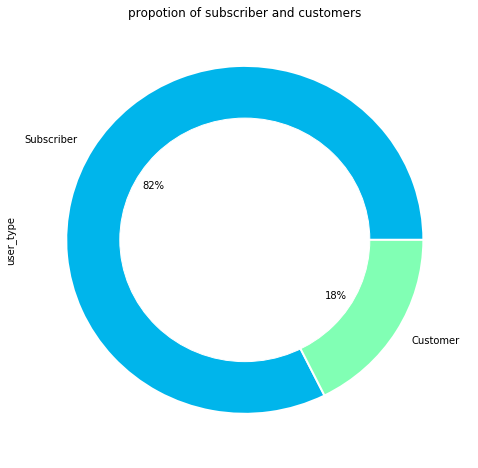

In [331]:
plt.figure(figsize=(8,8))
df1["user_type"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("propotion of subscriber and customers")
plt.show()

### Propotion of bike shared all trip 

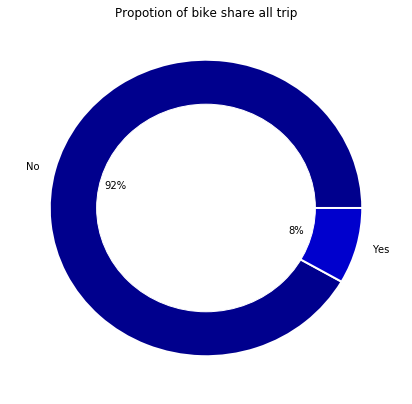

In [362]:
plt.figure(figsize=(7,15))
plt.subplot(211)
agg = df1.groupby(["bike_share_for_all_trip"]).agg({"bike_id":"count","duration":"sum"})
agg["bike_id"].plot.pie(colors=sns.color_palette("seismic",10),
                             autopct="%1.0f%%",
                             wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("Propotion of bike share all trip")
plt.show()

### The frequency of the rides used by members age_range

In [19]:
df1['member_age'] = 2019-df1['member_birth_year']

Text(0.5,1,'Rides used by Members age vs gender')

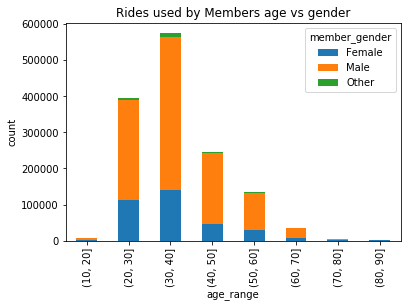

In [27]:

df1.groupby(['member_gender', pd.cut(df1['member_age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)
plt.xlabel("age_range")
plt.ylabel("count")
plt.title("Rides used by Members age vs gender")

### How has the propotion of member_gender(male or female)

Text(0.5,1,'Propotion OF MALE VS FEMALE')

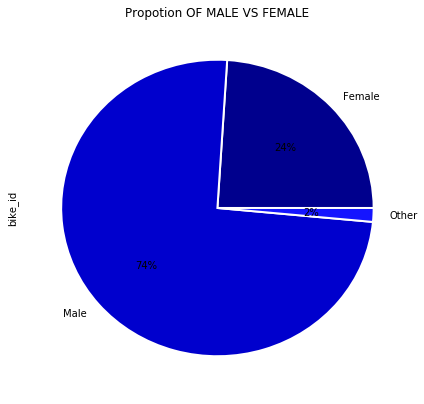

In [114]:
plt.figure(figsize=(7,15))
plt.subplot(211)
agg = df1.groupby(["member_gender"]).agg({"bike_id":"count","member_gender":"count",})
agg["bike_id"].plot.pie(colors=sns.color_palette("seismic",10),
                             autopct="%1.0f%%",
                             wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Propotion OF MALE VS FEMALE")


#### The total number of rides in 2018 and 2017

In [266]:
df1.start_year.value_counts()

2018    1018386
2017     519700
Name: start_year, dtype: int64

### Geomerty according to the station latitude and longitude

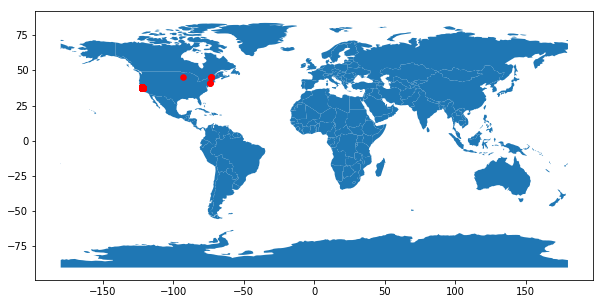

In [395]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df1['start_station_longitude'], df1['start_station_latitude'])]
gdf = GeoDataFrame(df1, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=30);

# co-relation graph

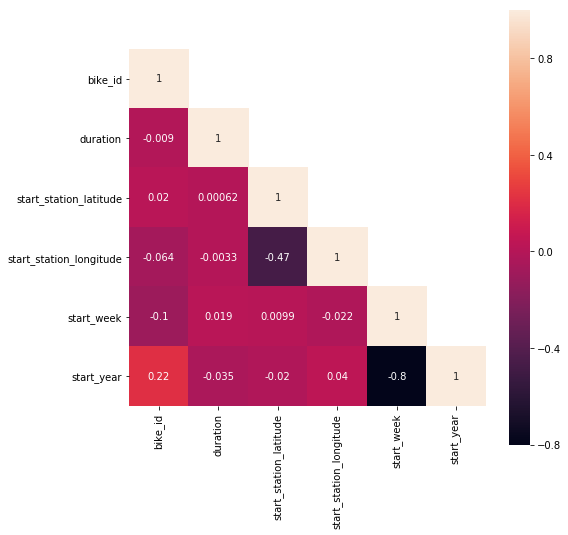

In [313]:
cor_mat = df1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(8,8)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

# Conclusion 

This Python script is written for Project of Udacity's Data Analyst Nanodegree (DAND) and is used to explore data related to ford bike data
From the analysis I am concluding the following points
<li>->The period between(2017-july to 2018july)has constantly increasing the usage of bike_riders</li>
    <li>->There are 82% suscribers and 18%customers</li>
    <li>->Also, more than 70% of users are in 30 to 50 years old age. Plus, 74% of bike rides by male</li>